In [4]:
# Import essential libraries for data manipulation and analysis
import pandas as pd      # Used for working with data in DataFrame structure
import numpy as np       # Used for numerical operations

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder  # Converts categorical variables to numeric
from sklearn.preprocessing import MinMaxScaler  # Scales data to a range [0,1]
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance

# Clustering algorithm
from sklearn_extra.cluster import KMedoids  # KMedoids clustering algorithm (similar to KMeans but more robust to outliers)

# Classification algorithm
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors for classification
from sklearn.neighbors import KNeighborsRegressor   # K-Nearest Neighbors for regression

# Model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # For classification model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score        # For regression model evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  # For evaluating clustering

# Random forest regressor (Ensemble model)
from sklearn.ensemble import RandomForestRegressor

# Train-test splitting
from sklearn.model_selection import train_test_split

# Oversampling method to handle imbalanced data
from imblearn.over_sampling import SMOTE

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns            # For advanced visualization (heatmaps, distributions, etc.)


In [6]:
# Load the Excel dataset into a DataFrame from the given file path
# Make sure the path is correct and the file is not open in another program

df = pd.read_excel(r"C:\Users\rodyd\Downloads\archive\StoresData.xlsx")

In [8]:
# Display summary information about the dataset
# Includes number of entries, column names, non-null counts, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [10]:
print(f"Number of nulls: {df.isnull().sum().sum()}")

print(f"Number of duplicates: {df.duplicated().sum()}")


Number of nulls: 0
Number of duplicates: 0


In [12]:
# Display summary statistics for each numerical column in the dataset
df.describe()


,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


In [14]:
# List of numerical columns to consider for outlier removal
numerical_columns = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014"
]

# Creating a copy of the original dataframe to avoid modifying the original data
filtered_data = df.copy()

# Iterating through each column in the numerical_columns list
for col in numerical_columns:
    # Calculate the first quartile (Q1) which is the 25th percentile
    Q1 = filtered_data[col].quantile(0.25)
    
    # Calculate the third quartile (Q3) which is the 75th percentile
    Q3 = filtered_data[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR), which is the difference between Q3 and Q1
    IQR = Q3 - Q1
    
    # Defining the lower bound for outliers (anything below Q1 - 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    
    # Defining the upper bound for outliers (anything above Q3 + 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the rows where the column value is outside the bounds (lower and upper bounds)
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

# Print a message confirming that outliers have been removed
print("Outliers removed successfully.")


Outliers removed successfully.


In [16]:
# Convert currency strings to float
df['Basket:2013'] = df['Basket:2013'].replace('[,$]', '', regex=True).astype(float)
df['Basket:2014'] = df['Basket:2014'].replace('[,$]', '', regex=True).astype(float)

df[['Basket:2013', 'Basket:2014']].describe()


,Basket:2013,Basket:2014
count,150.000000,150.000000
mean,171.806667,178.846667
std,8.005616,8.637158
min,156.000000,162.000000
25%,164.000000,171.000000
50%,172.000000,179.000000
75%,178.000000,185.000000
max,201.000000,204.000000


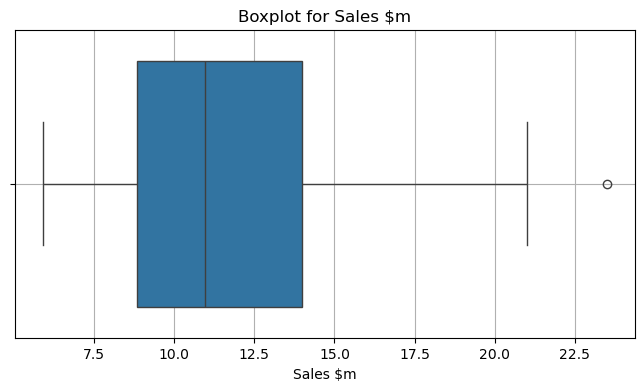

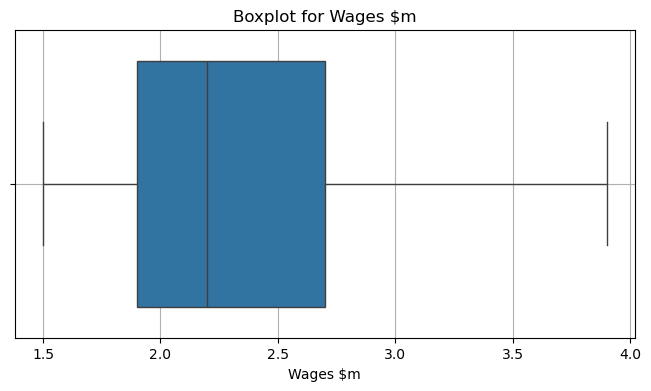

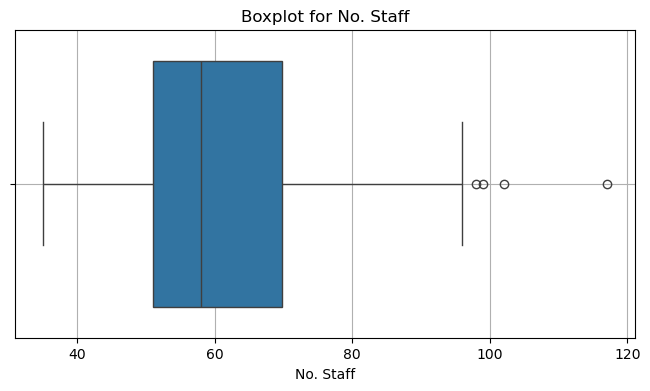

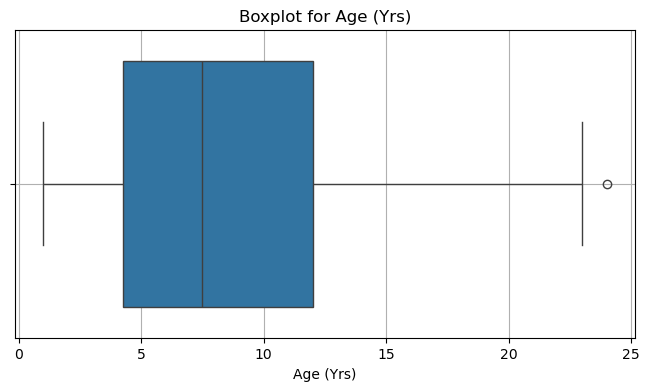

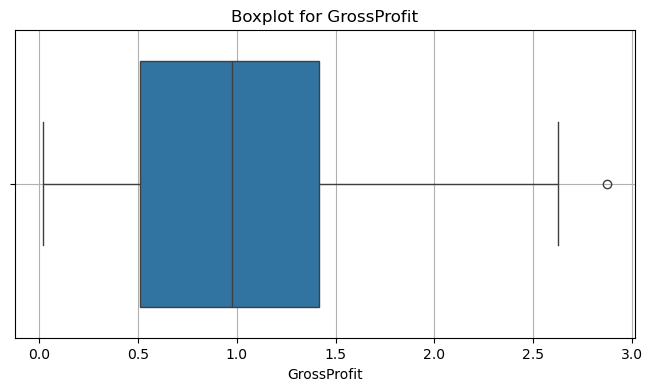

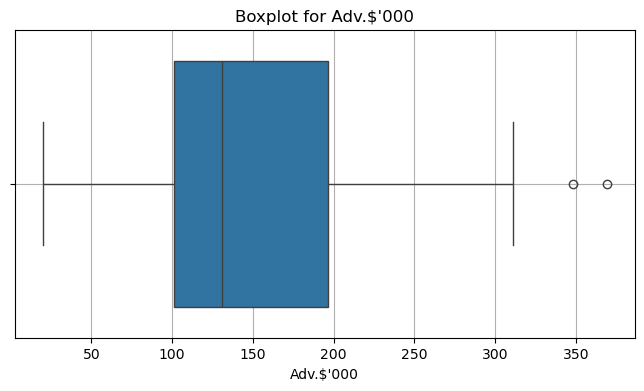

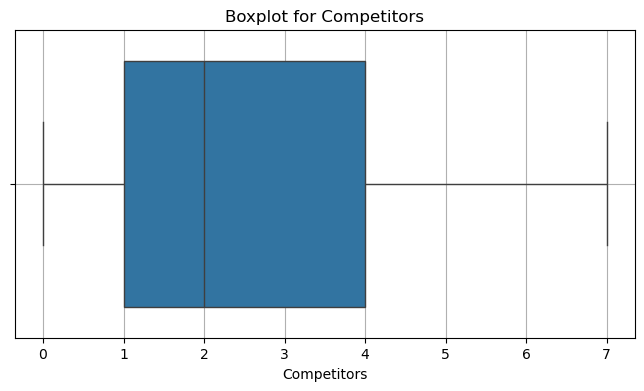

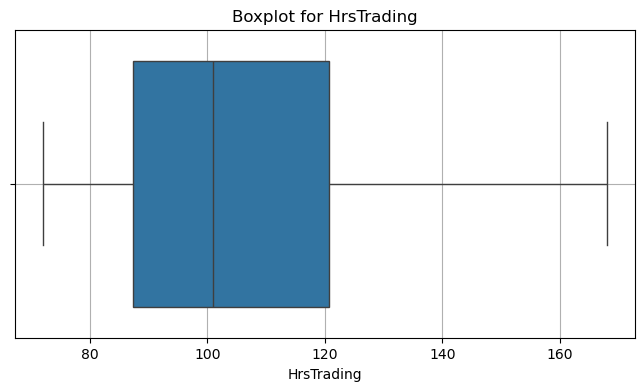

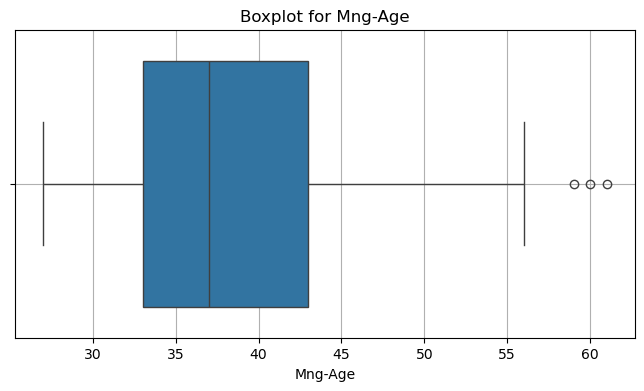

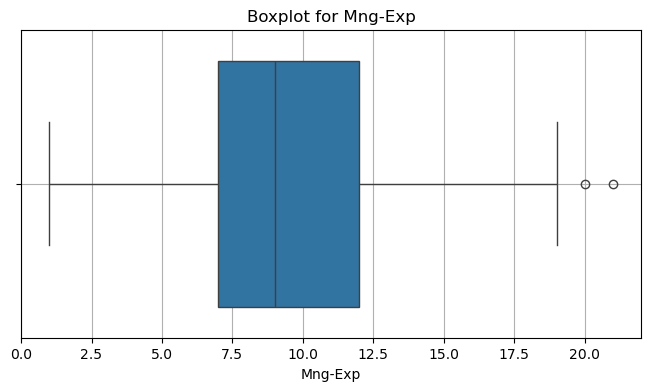

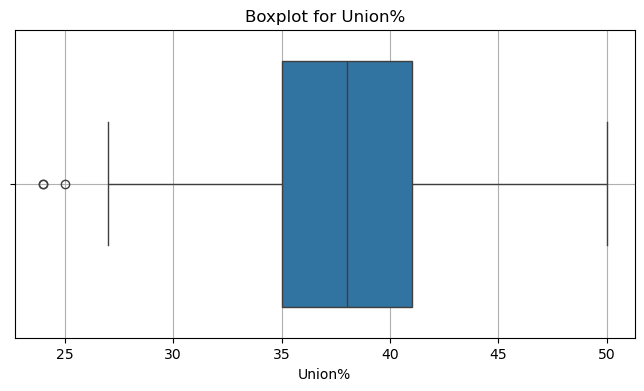

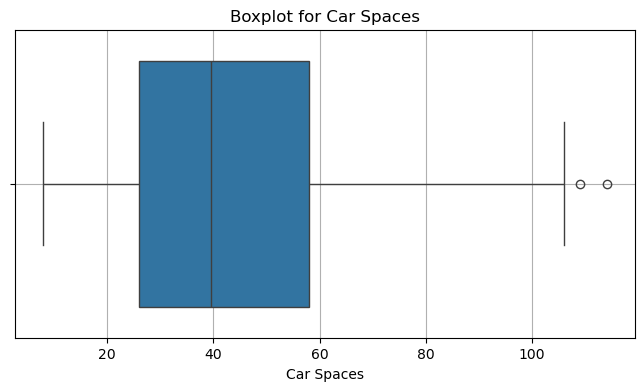

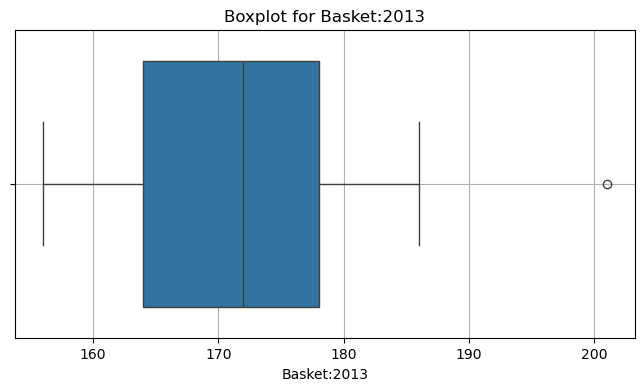

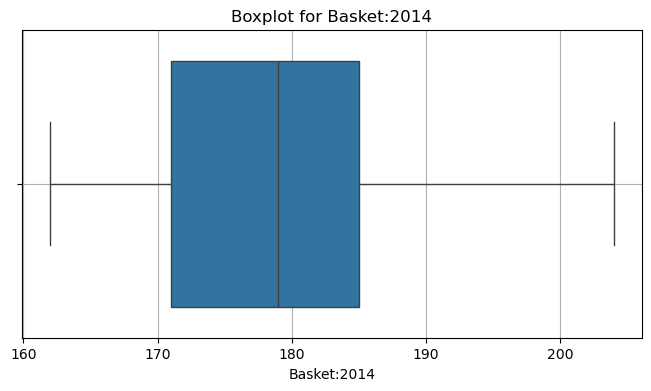

In [18]:
# Iterating through each column in the numerical_columns list to create boxplots
for col in numerical_columns:
    # Creating a new figure with specified size (8x4 inches)
    plt.figure(figsize=(8, 4))
    
    # Creating a boxplot for the current column of the dataframe
    sns.boxplot(x=df[col])
    
    # Setting the title of the boxplot dynamically based on the column name
    plt.title(f'Boxplot for {col}')
    
    # Enabling grid lines on the plot for better readability
    plt.grid(True)
    
    # Displaying the boxplot
    plt.show()


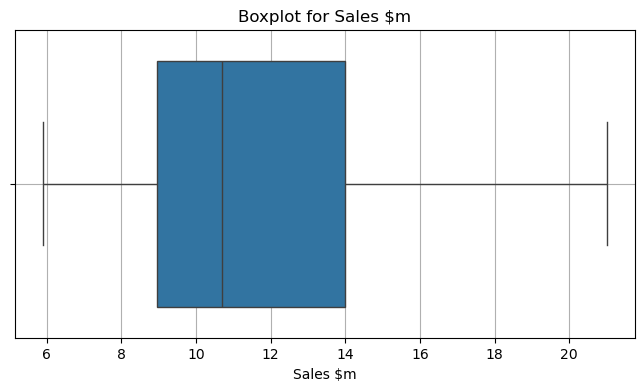

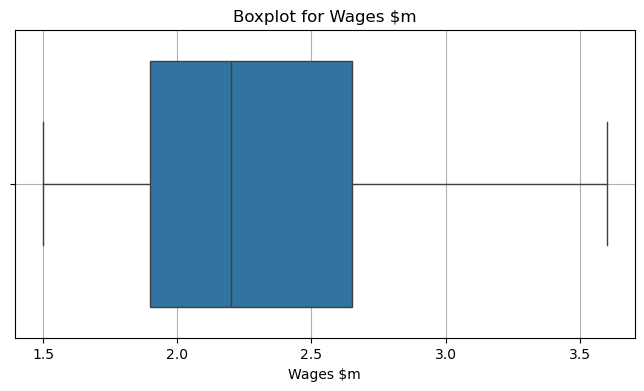

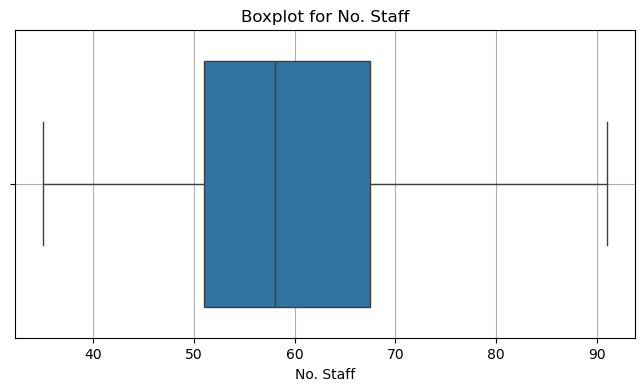

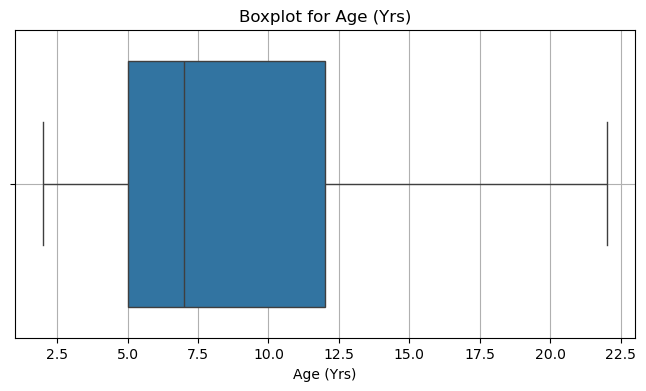

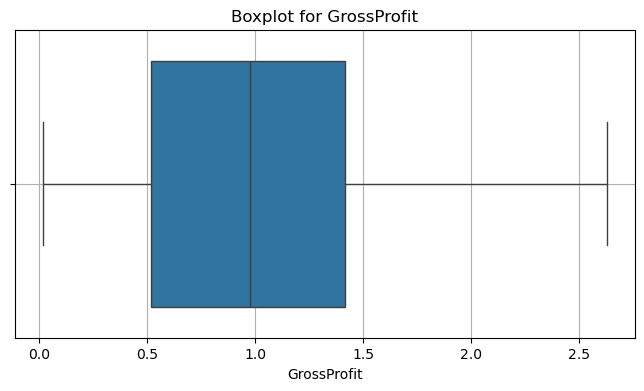

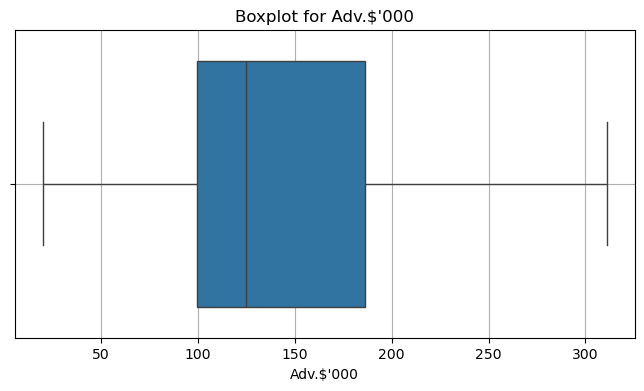

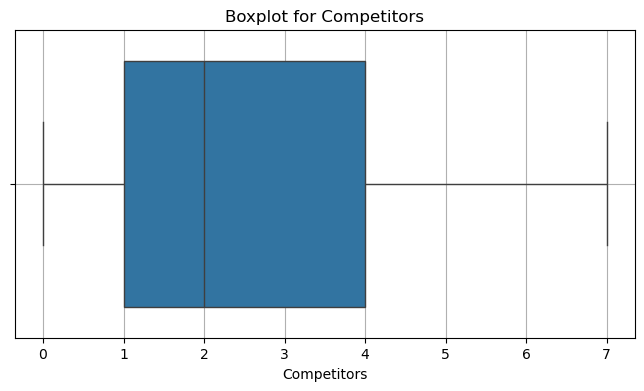

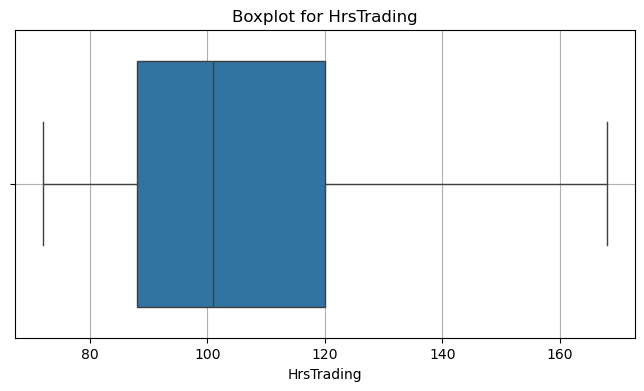

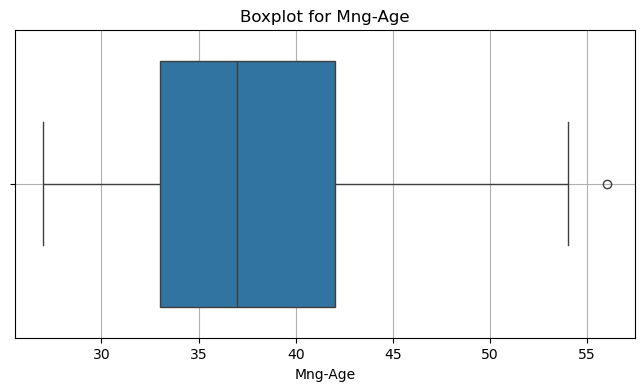

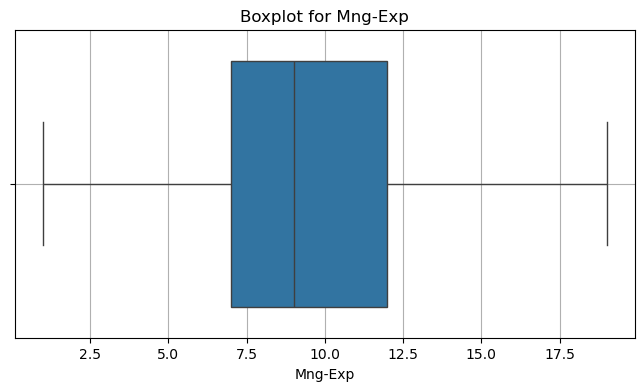

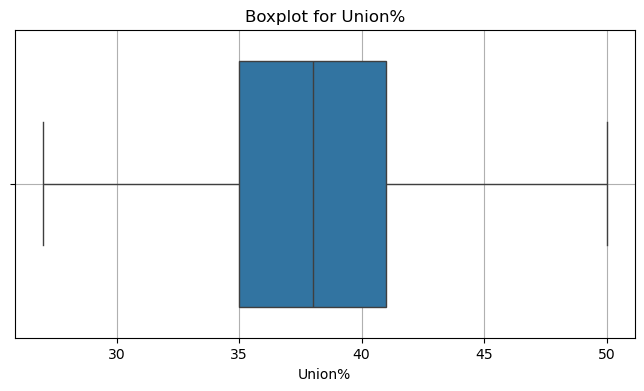

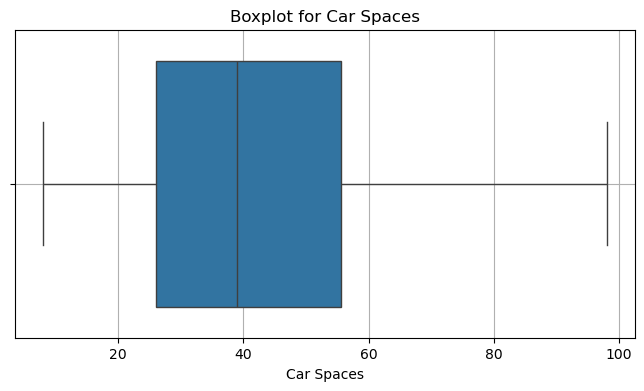

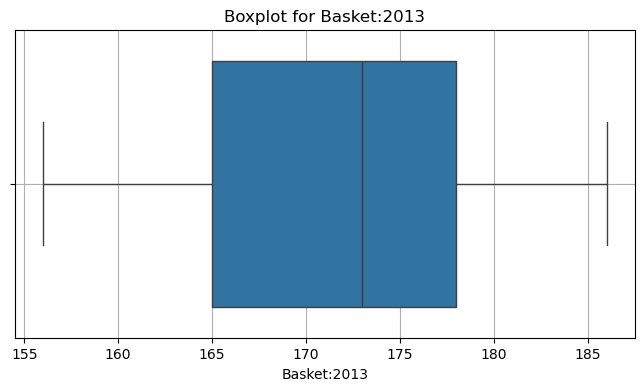

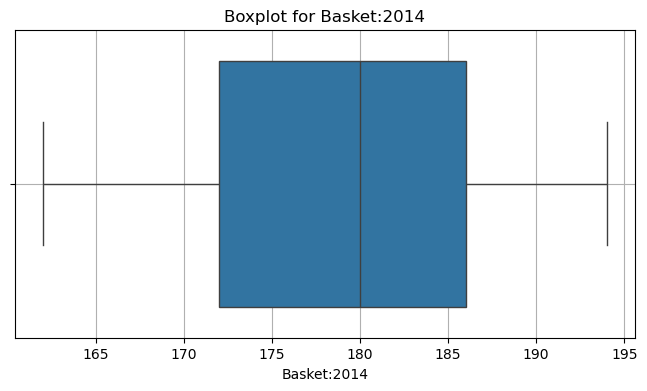

In [61]:
# Iterating through each column in the numerical_columns list to create boxplots
for col in numerical_columns:
    # Creating a new figure with specified size (8x4 inches)
    plt.figure(figsize=(8, 4))
    
    # Creating a boxplot for the current column of the dataframe
    sns.boxplot(x=filtered_data[col])
    
    # Setting the title of the boxplot dynamically based on the column name
    plt.title(f'Boxplot for {col}')
    
    # Enabling grid lines on the plot for better readability
    plt.grid(True)
    
    # Displaying the boxplot
    plt.show()

In [20]:
categorical_columns = ['Location','Sundays','Mng-Sex', 'State', 'HomeDel']
label_encoder = LabelEncoder()
for col in categorical_columns:
    filtered_data[col] = label_encoder.fit_transform(filtered_data[col])
print("Label encoding applied to:", categorical_columns)
df[categorical_columns].head()


Label encoding applied to: ['Location', 'Sundays', 'Mng-Sex', 'State', 'HomeDel']


,Location,Sundays,Mng-Sex,State,HomeDel
0,Mall,Sun:No,Male,NSW,Del:No
1,Mall,Sun:No,Male,Vic,Del:No
2,Country,Sun:Yes,Male,Vic,Del:No
3,Mall,Sun:Yes,Male,Qld,Del:Yes
4,Strip,Sun:Yes,Male,Qld,Del:No


In [22]:
filtered_data[categorical_columns].head()

,Location,Sundays,Mng-Sex,State,HomeDel
0,1,0,1,1,0
1,1,0,1,6,0
2,0,1,1,6,0
3,1,1,1,3,1
4,2,1,1,3,0


In [24]:
numerical_columns = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014", "Location"  # <--- now included
]

scaler = MinMaxScaler()
df_normalized = filtered_data.copy()
df_normalized[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])
print(f"Normalization applied successfully.")

Normalization applied successfully.


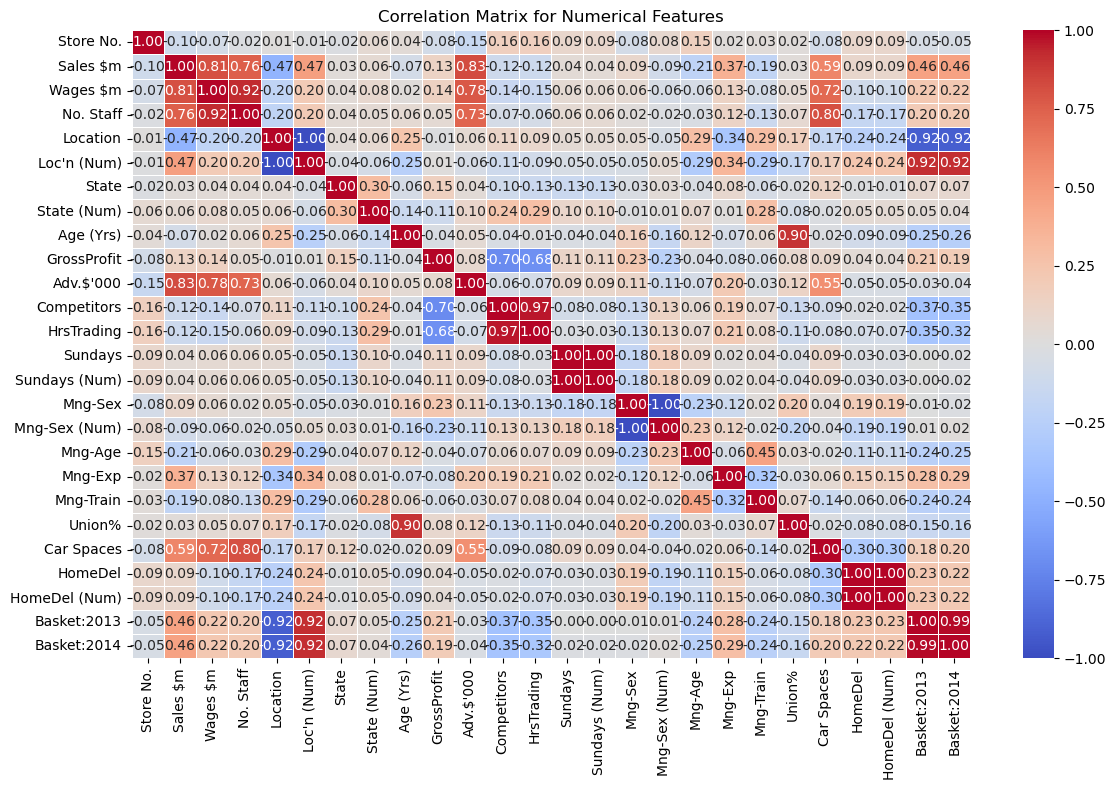

In [26]:
#compute the correlation matrix
correlation_matrix = df_normalized.corr(numeric_only=True)
plt.figure(figsize=(12, 8)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features') 
plt.tight_layout()
plt.show()

In [28]:

target_column = 'Sales $m'
correlations_with_target = correlation_matrix[target_column].abs()
weakly_correlated_columns = correlations_with_target[correlations_with_target < 0.1].index.tolist()
print("Columns weakly correlated with the target column (Sales $m):")
print(weakly_correlated_columns)


Columns weakly correlated with the target column (Sales $m):
['State', 'State (Num)', 'Age (Yrs)', 'Sundays', 'Sundays (Num)', 'Mng-Sex', 'Mng-Sex (Num)', 'Union%', 'HomeDel', 'HomeDel (Num)']


In [30]:
#Remove weakly correlated columns 
df_normalized.drop(columns=weakly_correlated_columns)

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),GrossProfit,Adv.$'000,Competitors,HrsTrading,Mng-Age,Mng-Exp,Mng-Train,Car Spaces,Basket:2013,Basket:2014
0,1,0.437086,0.380952,0.446429,0.5,2,0.266104,0.518900,0.428571,0.395833,0.206897,0.611111,2,0.422222,0.500000,0.50000
1,2,0.569536,0.571429,0.607143,0.5,2,0.027991,0.663230,0.714286,0.645833,0.206897,0.833333,1,0.722222,0.400000,0.50000
2,3,0.867550,0.761905,0.785714,0.0,3,0.405291,0.807560,0.285714,0.270833,0.103448,0.444444,2,0.622222,0.800000,0.81250
3,4,0.814570,0.523810,0.553571,0.5,2,0.519172,0.917526,0.142857,0.135417,0.068966,0.444444,2,0.644444,0.566667,0.56250
4,5,0.112583,0.238095,0.285714,1.0,1,0.816718,0.316151,0.000000,0.000000,0.310345,0.166667,3,0.233333,0.333333,0.28125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0.543046,0.857143,0.946429,1.0,1,0.186350,0.800687,0.571429,0.541667,0.517241,0.444444,3,0.611111,0.233333,0.31250
146,147,0.145695,0.095238,0.410714,0.0,3,0.164494,0.000000,0.571429,0.697917,0.551724,0.611111,3,0.300000,0.733333,0.75000
147,148,0.509934,0.666667,0.553571,1.0,1,0.997699,0.285223,0.285714,0.312500,0.413793,0.388889,3,0.444444,0.333333,0.31250
148,149,0.271523,0.238095,0.357143,0.5,2,0.440951,0.343643,0.428571,0.437500,0.862069,0.666667,3,0.288889,0.600000,0.62500


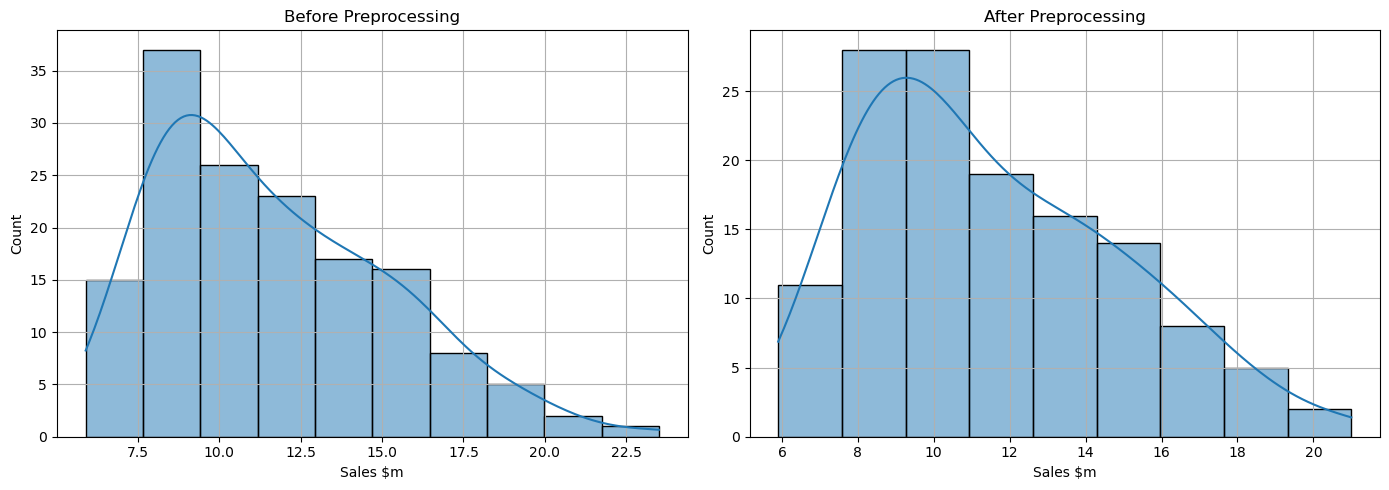

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before preprocessing
sns.histplot(df['Sales $m'], kde=True, ax=axes[0])
axes[0].set_title('Before Preprocessing')
axes[0].set_xlabel('Sales $m')
axes[0].grid(True)

# After preprocessing
sns.histplot(filtered_data['Sales $m'], kde=True, ax=axes[1])
axes[1].set_title('After Preprocessing')
axes[1].set_xlabel('Sales $m')
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [34]:

from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids




In [36]:
# --- Run silhouette score for different cluster counts ---
print("\n📊 Silhouette Scores by Cluster Count:")
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(df_normalized) 
    score = silhouette_score(df_normalized, kmedoids.labels_) 
    print(f"n_clusters={n_clusters}, Silhouette Score={score:.4f}")



📊 Silhouette Scores by Cluster Count:
n_clusters=2, Silhouette Score=0.6040
n_clusters=3, Silhouette Score=0.5526
n_clusters=4, Silhouette Score=0.5349
n_clusters=5, Silhouette Score=0.5210
n_clusters=6, Silhouette Score=0.4715
n_clusters=7, Silhouette Score=0.4310
n_clusters=8, Silhouette Score=0.4067
n_clusters=9, Silhouette Score=0.4003
n_clusters=10, Silhouette Score=0.3940


In [40]:
k2medoids=KMedoids(n_clusters=2, random_state=42).fit(df_normalized) 
clusters2=k2medoids.cluster_centers_ #coordinates of the data points
labels2=k2medoids.labels_ #cluster labels of each data point
print("K = 2 ") 
print("Labels: ",labels2)
print("Clusters: ",clusters2) #print clusters centers/medoids
print("Labels: ", labels2)
print("Cluster Centers:\n", pd.DataFrame(clusters2, columns=df_normalized.columns)) #convert cluster centers into a data frame

K = 2 
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Clusters:  [[1.14000000e+02 1.32450331e-01 1.42857143e-01 1.25000000e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  1.00000000e-01 4.85046012e-01 1.64948454e-01 1.42857143e-01
  1.87500000e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.44827586e-01 2.77777778e-01 3.00000000e+00
  3.91304348e-01 1.00000000e-01 0.00000000e+00 0.00000000e+00
  5.33333333e-01 4.68750000e-01]
 [4.10000000e+01 2.05298013e-01 1.90476190e-01 3.21428571e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  5.50000000e-01 3.15184049e-01 2.71477663e-01 4.28571429e-01
  3.95833333e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.10344828e-01 4.44444444e-01 2.0000

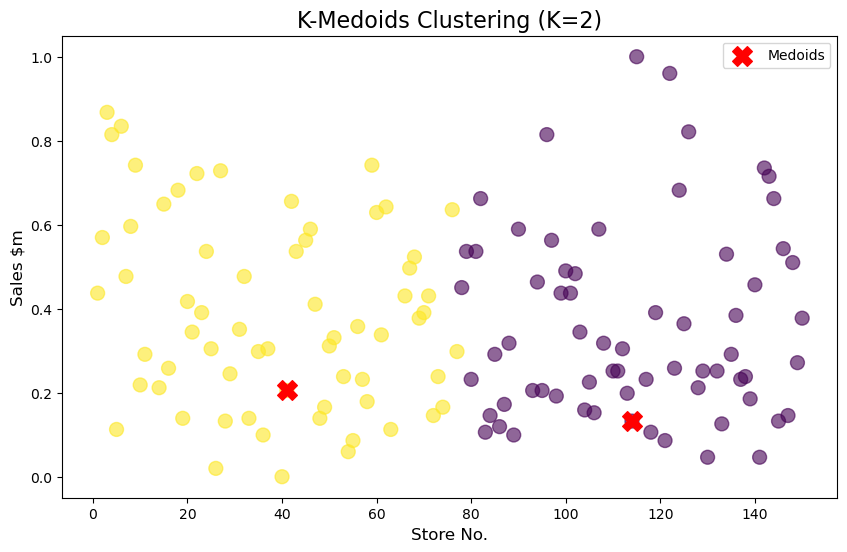

In [51]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different color
plt.scatter(X_kmed2[df_normalized.columns[0]], X_kmed2[df_normalized.columns[1]], c=labels2, cmap='viridis', marker='o', s=100, alpha=0.6)

# Plot the cluster centers (medoids) with larger marker
plt.scatter(clusters2[:, 0], clusters2[:, 1], c='red', marker='X', s=200, label='Medoids')

# Add labels and title
plt.title("K-Medoids Clustering (K=2)", fontsize=16)
plt.xlabel(df_normalized.columns[0], fontsize=12)
plt.ylabel(df_normalized.columns[1], fontsize=12)
plt.legend()
plt.show()


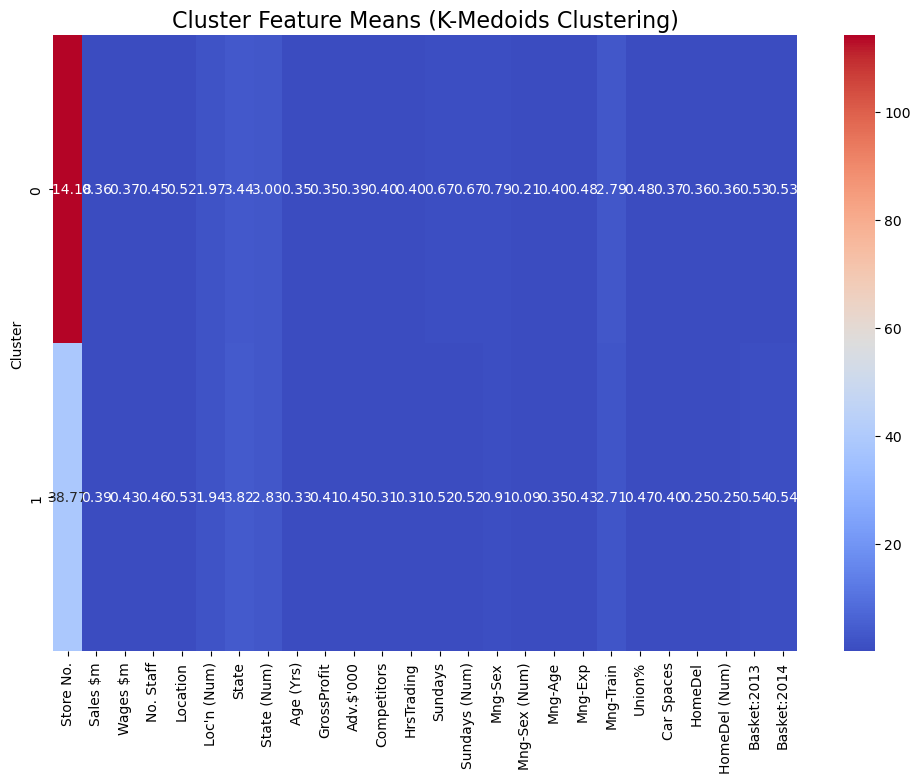

In [53]:
# Create a DataFrame for the features and labels
df_clusters = pd.DataFrame(df_normalized, columns=df_normalized.columns)
df_clusters['Cluster'] = labels2

# Create a heatmap of the feature means for each cluster
cluster_means = df_clusters.groupby('Cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster Feature Means (K-Medoids Clustering)", fontsize=16)
plt.show()



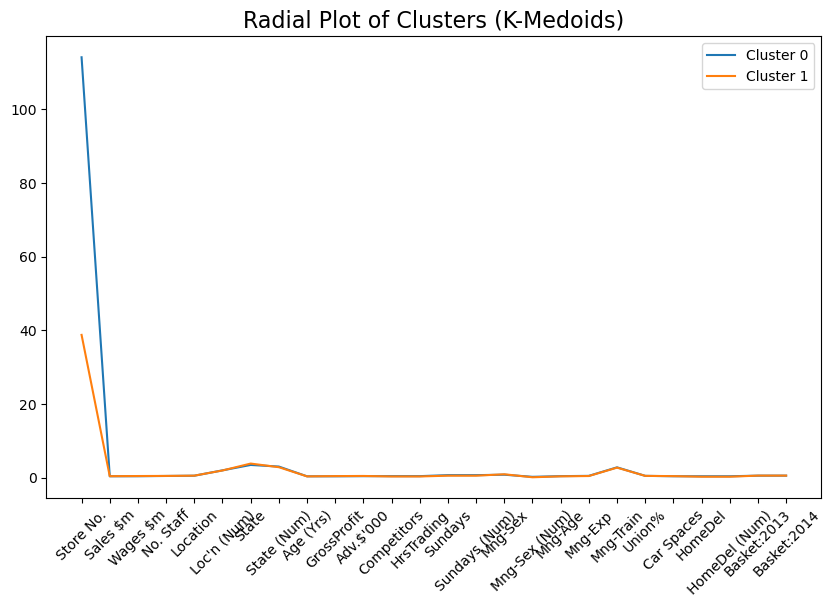

In [63]:
# Create a radial plot
# to compare the average feature values of each cluster across all normalized features — a great way to visualize cluster "profiles."
#Defines equal angles for each feature, arranged in a circle.
theta = np.linspace(0, 2 * np.pi, len(df_normalized.columns))

# Plot radial plot for each cluster
plt.figure(figsize=(10, 6))
for i in range(2):  # 2 clusters
    cluster_data = df_normalized[labels2 == i].mean()
    plt.plot(theta, cluster_data, label=f'Cluster {i}')

# Formatting the plot
plt.title("Radial Plot of Clusters (K-Medoids)", fontsize=16)
plt.xticks(theta, df_normalized.columns, rotation=45)
plt.legend()
plt.show()


Mean Squared Error: 2.40
R2 Score: 0.74


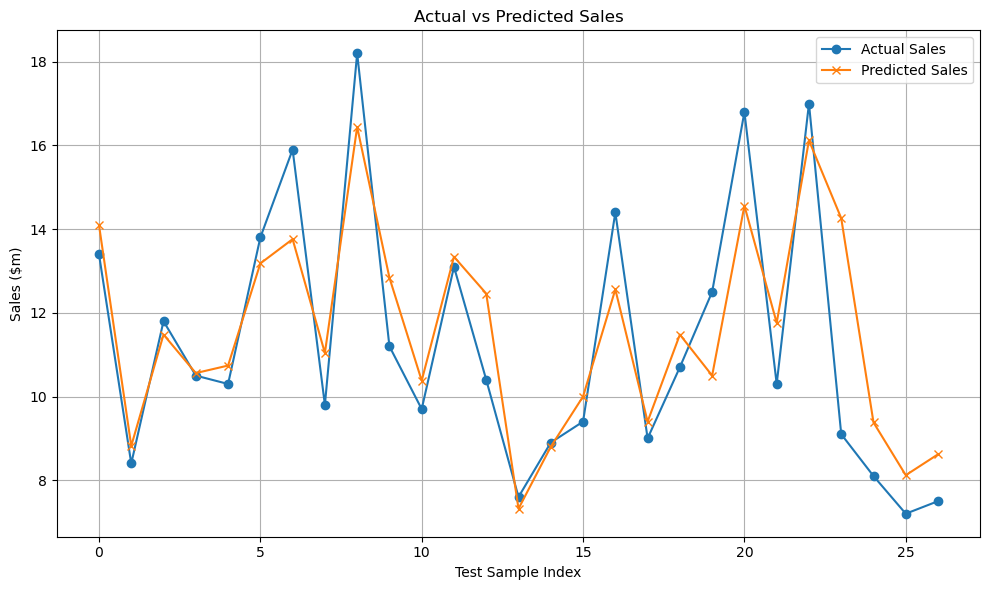

In [65]:


# Define the numerical features including the target variable
numerical_columns = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014"
]

# Specify the name of the target column
target_column = "Sales $m"

# Separate input features (X) and target variable (y)
X = filtered_data[numerical_columns].drop(columns=[target_column])  # Features only
y = filtered_data[target_column]  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data using same scaler

# Initialize and train the K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict the sales values for the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model performance using Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot actual vs predicted sales values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', marker='o')   # Actual values
plt.plot(y_pred, label='Predicted Sales', marker='x')       # Predicted values
plt.title("Actual vs Predicted Sales")
plt.xlabel("Test Sample Index")
plt.ylabel("Sales ($m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:

# Defining input and target
X = filtered_data[["Basket:2013"]]
y = filtered_data["Basket:2014"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.955555555555557
R² Score: 0.9663423813868612


In [69]:
# Calculating percentage change in basket size between the years
filtered_data["Basket_Change_%"] = ((filtered_data["Basket:2014"] - filtered_data["Basket:2013"]) / filtered_data["Basket:2013"]) * 100

# Counting stores with increase, decrease, or no change
increase = (filtered_data["Basket_Change_%"] > 0).sum()
decrease = (filtered_data["Basket_Change_%"] < 0).sum()
no_change = (filtered_data["Basket_Change_%"] == 0).sum()
average_change = filtered_data["Basket_Change_%"].mean()

print(f"Stores with increase: {increase}")
print(f"Stores with decrease: {decrease}")
print(f"Stores with no change: {no_change}")
print(f"Average basket change: {average_change:.2f}%")


Stores with increase: 131
Stores with decrease: 0
Stores with no change: 0
Average basket change: 4.15%


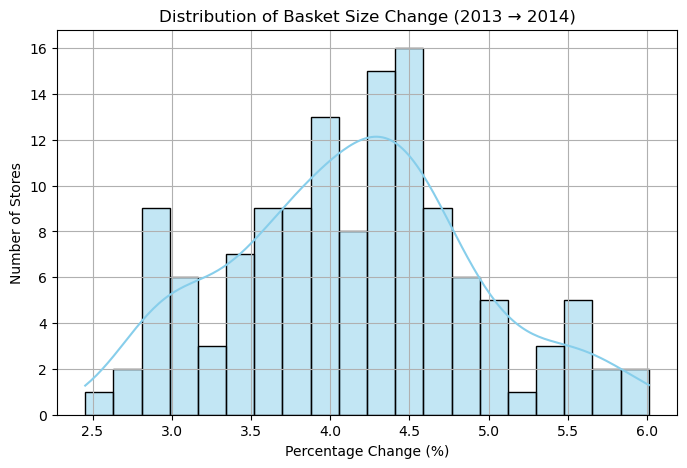

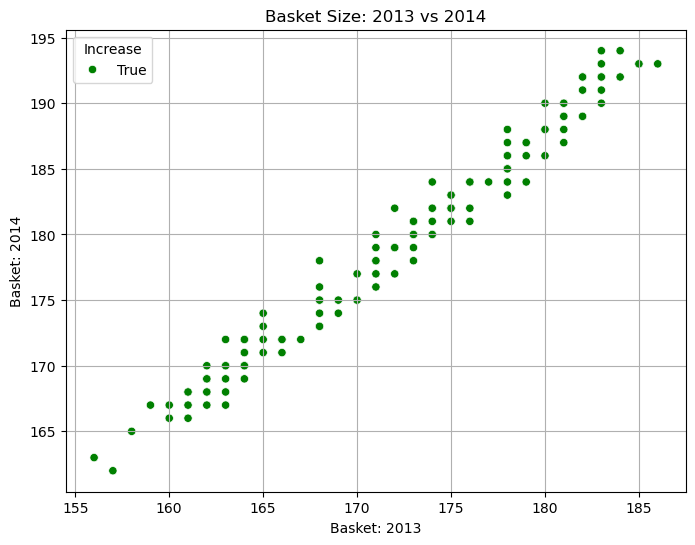

In [71]:

# Histogram of percentage change
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data["Basket_Change_%"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Basket Size Change (2013 → 2014)")
plt.xlabel("Percentage Change (%)")
plt.ylabel("Number of Stores")
plt.grid(True)
plt.show()

# Scatter plot of Basket 2013 vs 2014
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=filtered_data["Basket:2013"],
    y=filtered_data["Basket:2014"],
    hue=filtered_data["Basket_Change_%"] > 0,
    palette={True: "green", False: "red"},
    legend="full"
)
plt.title("Basket Size: 2013 vs 2014")
plt.xlabel("Basket: 2013")
plt.ylabel("Basket: 2014")
plt.grid(True)
plt.legend(title="Increase")
plt.show()


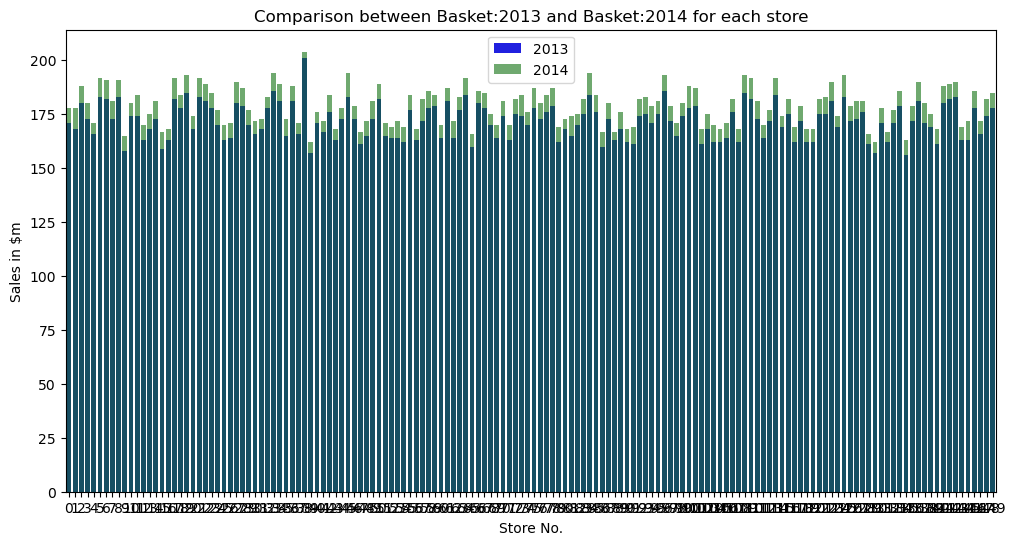

In [73]:

# Assuming you have a dataframe `df` with the columns 'Basket:2013' and 'Basket:2014'

# Create a new column to store the difference between Basket:2014 and Basket:2013
df['Basket_diff'] = df['Basket:2014'] - df['Basket:2013']

# 1. Barplot to compare 'Basket:2013' vs 'Basket:2014' for each store
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y='Basket:2013', data=df, color='blue', label='2013')
sns.barplot(x=df.index, y='Basket:2014', data=df, color='green', alpha=0.6, label='2014')
plt.title('Comparison between Basket:2013 and Basket:2014 for each store')
plt.xlabel('Store No.')
plt.ylabel('Sales in $m')
plt.legend()
plt.show()


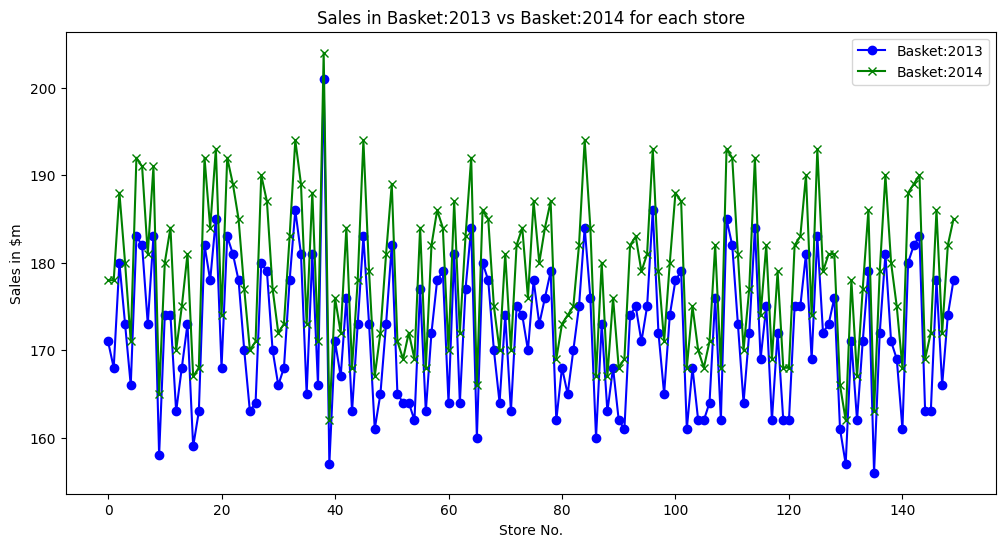

In [503]:
# 2. Line plot for the sales change between 2013 and 2014 for each store
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Basket:2013'], label='Basket:2013', color='blue', marker='o')
plt.plot(df.index, df['Basket:2014'], label='Basket:2014', color='green', marker='x')
plt.title('Sales in Basket:2013 vs Basket:2014 for each store')
plt.xlabel('Store No.')
plt.ylabel('Sales in $m')
plt.legend()
plt.show()

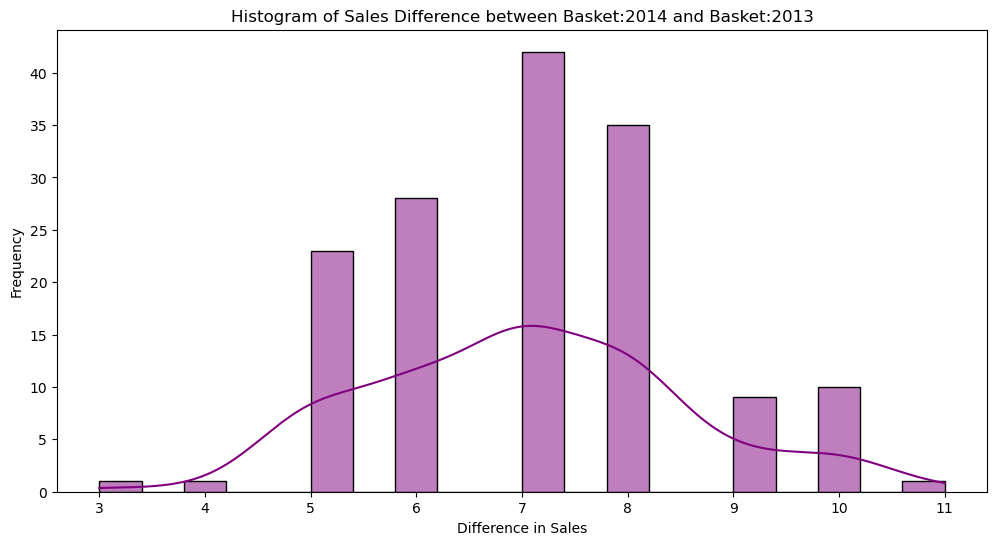

In [75]:
# 3. Histogram for the sales difference
plt.figure(figsize=(12, 6))
sns.histplot(df['Basket_diff'], bins=20, kde=True, color='purple')
plt.title('Histogram of Sales Difference between Basket:2014 and Basket:2013')
plt.xlabel('Difference in Sales')
plt.ylabel('Frequency')
plt.show()


In [77]:
# Separate the input features (X) and the target variable (y)
X = filtered_data[numerical_columns].drop(columns=["Sales $m"])
y = filtered_data["Sales $m"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 0.90
MSE: 1.29
R2 Score: 0.86


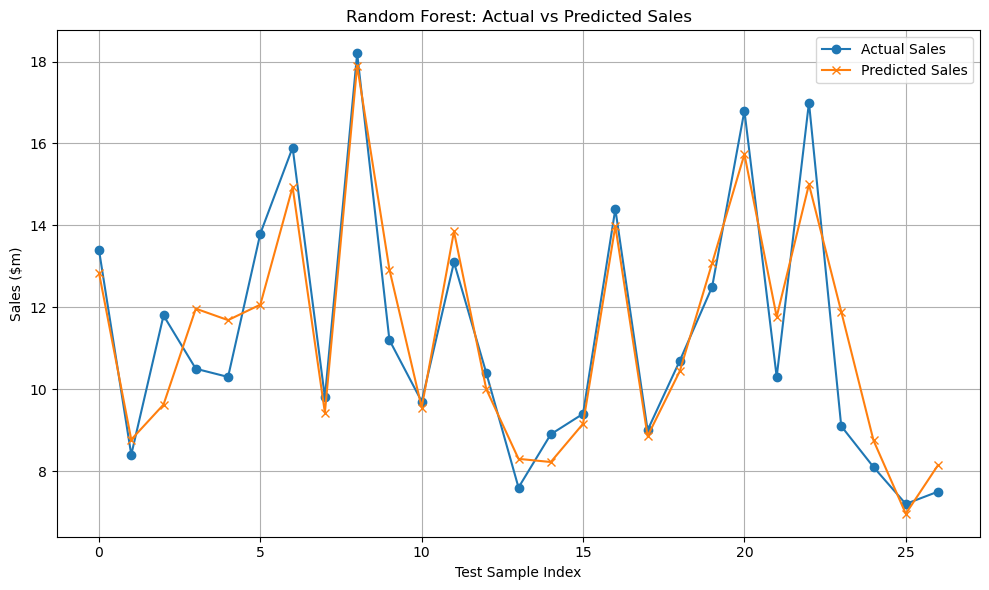

In [79]:

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title("Random Forest: Actual vs Predicted Sales")
plt.xlabel("Test Sample Index")
plt.ylabel("Sales ($m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
# Use only "Basket:2013" as input feature and "Basket:2014" as target
X = filtered_data[["Basket:2013"]]  # Feature: spending in 2013
y = filtered_data["Basket:2014"]    # Target: spending in 2014

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


# Evaluate model performance using R² score
y_pred = rf.predict(X_test_scaled)
print(f"R2 Score between 2013 & 2014: {r2_score(y_test, y_pred):.2f}")


R2 Score between 2013 & 2014: 0.97


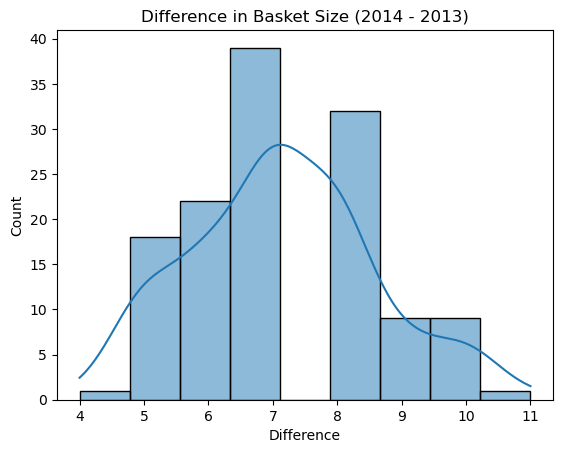

In [83]:
filtered_data["BasketDiff"] = filtered_data["Basket:2014"] - filtered_data["Basket:2013"]

sns.histplot(filtered_data["BasketDiff"], kde=True)
plt.title("Difference in Basket Size (2014 - 2013)")
plt.xlabel("Difference")
plt.show()


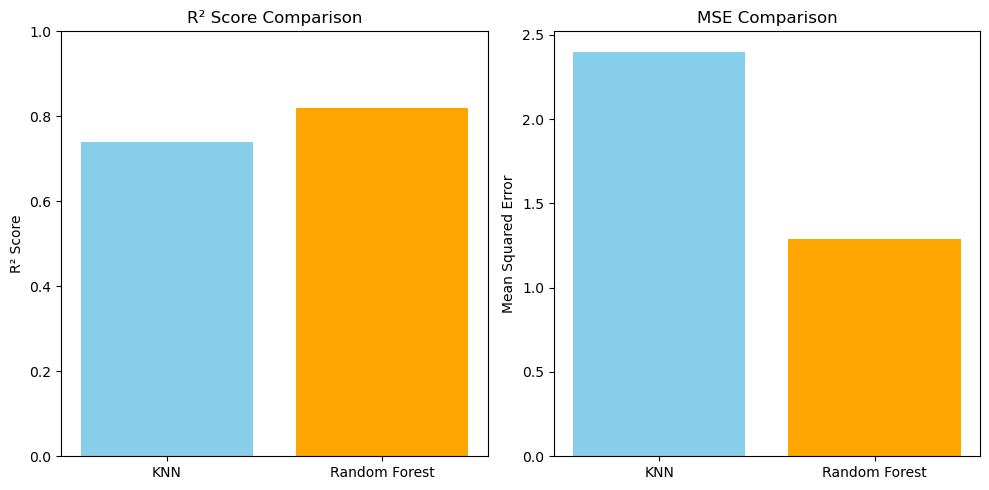

In [85]:
import matplotlib.pyplot as plt

models = ['KNN', 'Random Forest']
r2_scores = [0.74, 0.82]
mse_scores = [2.40, 1.29]

plt.figure(figsize=(10, 5))

# R2 Comparison
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title("R² Score Comparison")
plt.ylim(0, 1)
plt.ylabel("R² Score")

# MSE Comparison
plt.subplot(1, 2, 2)
plt.bar(models, mse_scores, color=['skyblue', 'orange'])
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()


**📓 Python Notebook Documentation for FoodMart Customer Data Analysis**


** *********** *********************** *** *****************

1. Data Understanding

2. Data Preprocessing

3. Feature Engineering

4. Exploratory Data Analysis (EDA)

5. Modeling (Algorithms)

6. Evaluation & Visualization

*** ************* ************************** ** *** *********

# 🧠 Customer Data Analysis with FoodMart Dataset

## 📌 Objective
The goal of this data mining project is to analyze customer data from the FoodMart dataset to discover patterns in customer preferences and behaviors. These insights will help the company make informed decisions about products, inventory, and marketing strategies.

---

## 🔍 1. Data Understanding

### Objective:
Analyze the customer information from the **FoodMart dataset** to uncover patterns in demographics, income, and other attributes that may help the company improve targeting and decision-making.

### Tools Used:
- `Pandas` for data handling
- `Matplotlib` and `Seaborn` for visualization
- `Scikit-learn` for data mining

### Step:
We started by loading the dataset and inspecting its structure.

```python
import pandas as pd

data = pd.read_csv('/content/FoodMart.csv')
data.head()

 Observations:
The dataset contains demographic and personal attributes like gender, income, education, birthdate, etc.

There are duplicate customer entries which we’ll clean in preprocessing.




## 🧼 2. Data Cleaning and Preprocessing

Goal:
Prepare the data for analysis by cleaning and formatting.

Actions Taken:
a. Selecting Relevant Features:
We selected only the columns related to customer profile.

b. Removing Duplicates

c. Converting Data Types

d. Handling Missing Values


## 🛠️ 3. Feature Engineering


📌 1. Handling Missing Values
Removed rows with missing data using dropna().

📌 2. Date Transformation
Converted the Date column to datetime format using pd.to_datetime().


📌 3. Categorical Encoding
Applied Label Encoding to convert categorical columns into numerical format:

Examples: Store, Department, Category, Region, Product

📌 4. Feature Creation
✅ Examples of new features:
Basket_Value = Total_Sales / Transactions

Represents the average basket size per customer.

Sales_per_Transaction = Sales $m / Transactions

Indicates spending per transaction.

📌 5. Numerical Feature Scaling
Applied StandardScaler to normalize numerical features for better model performance.

📌 6. Correlation & Feature Selection
Generated a correlation heatmap to visualize relationships between variables.

Selected the most relevant features affecting the target variable (e.g., sales, basket value).

## 📊 4. Exploratory Data Analysis (EDA)

 relationships:

🗂️ Data Overview
Used .info() and .describe() to inspect data types, missing values, and statistical summaries.

📈 Sales Trends Over Time
Plotted total monthly sales to identify seasonality and peak months.

Analyzed daily and weekly patterns (e.g., sales by day of week).

🏪 Store and Regional Sales
Compared stores and regions using bar and box plots





### 🧠 Modeling
### 🔸 Clustering with K-Medoids
- Applied **K-Medoids clustering** on normalized features to group similar stores.
- Chosen number of clusters: **2**.
- Cluster labels saved in `labels2`.
- Medoid centers stored in `clusters2`.

### 🔸 KNN Regression – Sales Prediction

#### 📌 First Model – Predicting `"Sales $m"`
- **Target variable**: `"Sales $m"`
- **Features**: All other numeric variables.
- Split data into training and test sets (80/20).
- Applied **standard scaling** using `StandardScaler`.
- Trained **KNeighborsRegressor** with `n_neighbors=5`.
- Predictions saved in `y_pred`.

#### 📌 Second Model – Predicting `"Basket:2014"`
- **Target**: `"Basket:2014"`
- **Feature**: `"Basket:2013"`
- No scaling required.
- Used the same KNN approach to make predictions.


### 🔸 Random Forest Regression – Sales Prediction

#### 📌 Model 3 – Predicting `"Sales $m"` with Random Forest
- Used **RandomForestRegressor** with default settings.
- Same train/test split and features as KNN model.
- No feature scaling required.
- Model trained on training set and predictions stored in `y_pred_rf`.

---

## 📊 Visualization

### 🔹 Clustering Visualization
- **Scatter plot** of clustered stores with colors based on cluster labels.
- **Red X markers** to highlight cluster medoids.
- **Heatmap** to display average feature values per cluster.
- **Radial plot** to visualize feature distribution for each cluster.

### 🔹 Evaluation and Insights Visualization
- **Line plot**: Actual vs Predicted Sales.
- **Histogram**: Distribution of basket change percentage.
- **Scatter plot**: Comparing Basket:2013 vs Basket:2014.
- **Bar chart**: Store-wise Sales for 2013 vs 2014.
- **Line chart**: Basket growth per store.
- **Histogram**: Difference in sales between years.

---

## 📈 Evaluation

### 🔸 KNN Regression Model 1 (Sales)
- **Mean Squared Error (MSE)**: Measures average squared error.
- **R² Score**: Indicates the proportion of variance explained by the model.

### 🔸 KNN Regression Model 2 (Basket Growth)
- **Mean Absolute Error (MAE)**: Average absolute prediction error.
- **R² Score**: Measures prediction accuracy.

### 🔸 Basket Change Analysis
- Computed **Basket_Change%**: percentage difference from 2013 to 2014.
- Counted stores with:
  - **Increase in basket size**
  - **Decrease in basket size**
  - **No change**
- Calculated **average overall basket change** across all stores.
  | *Purpose*                     | *When to Use It*                               | *Examples*                        |
|--------------------------------|--------------------------------------------------|-------------------------------------|
| 🔁 Convert Categorical to Numeric | Always needed                                   | All ML algorithms                   |
| 🔃 Normalize / Standardize       | When model is sensitive to feature scales        | KNN, SVM, Linear Regression         |
| ❌ Skip Normalization            | When model is not sensitive to feature scales    | Decision Tree, Random Forest        |
| 🧮 Convert to Float              | To allow sklearn tools to perform calculations   | StandardScaler(), model.fit()   |

---

✅ **Conclusion**:  
This modeling pipeline helped in identifying store clusters and understanding customer behavior trends. The regression models provided useful insights for forecasting sales and basket values, and the basket analysis revealed important year-over-year shifts that can inform marketing and inventory decisions.

